In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df_test = pd.read_excel('../part2/남북한발전전력량.xlsx', 
                        header = 0, sheet_name = '데이터_2')

df_test = df_test.fillna(method = 'ffill')
df_test
# df_test.shape
mask = df_test['전력량 (억㎾h)'] == '남한'
# mask = [True, False]*4 +[False]
# print(mask)
df_test[mask]

,전력량 (억㎾h),발전 전력별,1990,1991,1992
0,남한,합계,1077,1186,1310
1,남한,수력,64,51,49
2,남한,화력,484,573,696
3,남한,원자력,529,563,565
4,남한,신재생,-,-,-


In [42]:
df = pd.read_excel('./시도별 전출입 인구수.xlsx', 
                   header = 0)
df = df.fillna(method = 'ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul.head()
df_seoul.drop('전출지별', axis = 1, inplace = True)
df_seoul.head()
df_seoul.rename(columns= {'전입지별':'전입지'}, inplace = True)
df_seoul.head()
df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

c:\Users\ETV\anaconda3\envs\pandas_nb\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\ETV\AppData\Local\Temp\ipykernel_10636\1950091332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지별', axis = 1, inplace = True)
C:\Users\ETV\AppData\Local\Temp\ipykernel_10636\1950091332.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename(columns= {'전입지별':'전입지'}, inplace = True)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [34]:
# df_seoul.index
sr_one = df_seoul.loc['경기도', :]
sr_one

sr_one.index
# sr_one.values


Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [56]:
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/H2GTRE.TTF'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

In [58]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


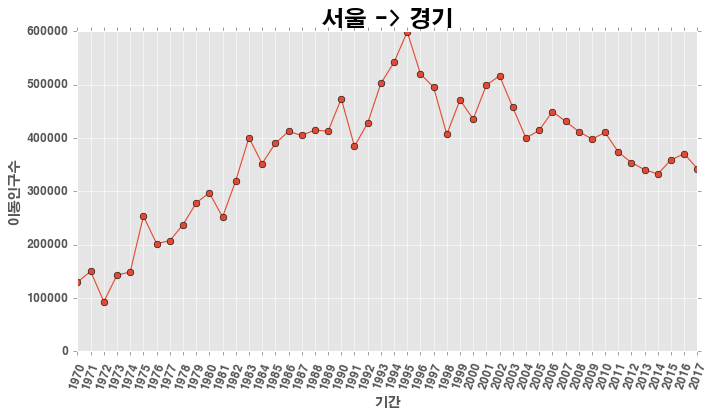

In [57]:
plt.style.use('ggplot')
# plt.style.use('tableau-colorblind10')
# plt.style.use('dark_background')
# plt.style.use('classic')

plt.figure(figsize = (10, 5))
plt.plot(sr_one.index, sr_one.values, marker = 'o')

plt.title('서울 -> 경기', size = 20)
plt.xlabel('기간')
plt.ylabel('이동인구수')

plt.xticks(rotation = 70)
plt.show()

C:\Users\ETV\AppData\Local\Temp\ipykernel_10636\1323003292.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(sr_one.index, rotation = 90)
C:\Users\ETV\AppData\Local\Temp\ipykernel_10636\1323003292.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(sr_one.index, rotation = 90)


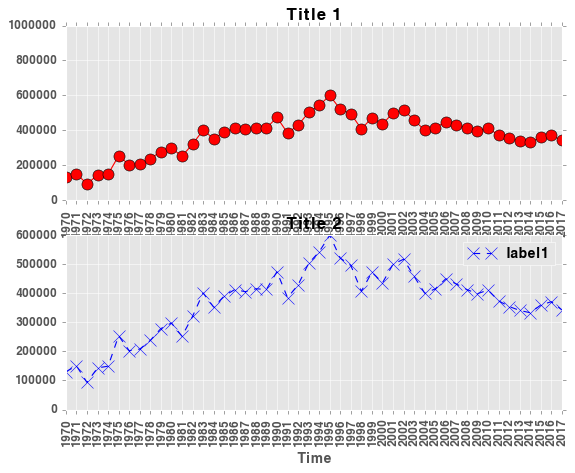

In [70]:
# sr_one = df_seoul.loc['경기도']
# print(sr_one)

fig, ax = plt.subplots(2, 1)
ax[0].plot(sr_one, 'ro-', markersize = 10)
ax[1].plot(sr_one, 'bx--', markersize = 10, label = 'label1')

ax[0].set_ylim(0, 1000000)

ax[0].set_title('Title 1')
ax[1].set_title('Title 2')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

ax[0].set_xticklabels(sr_one.index, rotation = 90)
ax[1].set_xticklabels(sr_one.index, rotation = 90)

# plt.xticks(rotation =90)
# plt.tick_params(labelrotation = 90)
ax[1].legend()

plt.show()
# print(ax)

In [72]:
df_seoul.head()
df_seoul.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [73]:
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도']]
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [75]:
print(df_seoul.columns)
df_seoul.loc['충청남도']

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


1970    15954
1971    18943
1972    23406
1973    27139
1974    25509
1975    51205
1976    41447
1977    43993
1978    48091
1979    45388
1980    54480
1981    51369
1982    48834
1983    55344
1984    50318
1985    49520
1986    47888
1987    48678
1988    49038
1989    31707
1990    29993
1991    28211
1992    26600
1993    25958
1994    22293
1995    26501
1996    27159
1997    27395
1998    25928
1999    26726
2000    23083
2001    22056
2002    21155
2003    24942
2004    30246
2005    26012
2006    25986
2007    28898
2008    27458
2009    24889
2010    24522
2011    24723
2012    22269
2013    21486
2014    21473
2015    22299
2016    21741
2017    21020
Name: 충청남도, dtype: object

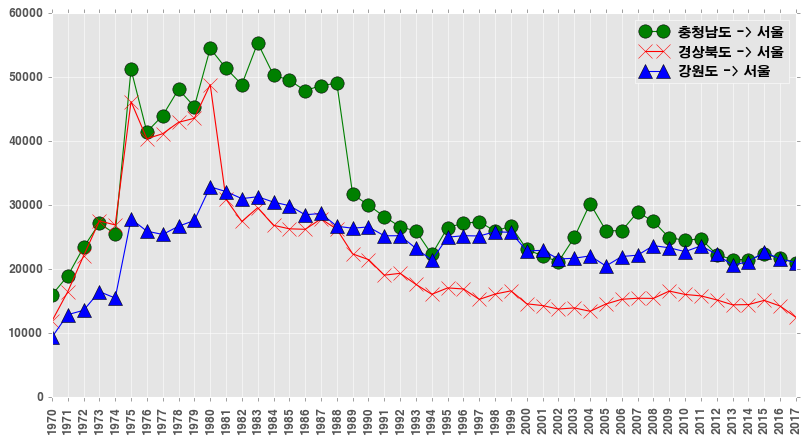

In [79]:
plt.figure(figsize = (12, 6))
plt.plot(df_seoul.columns, df_seoul.loc['충청남도'],
         marker = 'o', markersize = 12, color = 'g', label = '충청남도 -> 서울')
plt.plot(df_seoul.columns, df_seoul.loc['경상북도'],
         marker = 'x', markersize = 12, color = 'r', label = '경상북도 -> 서울')
plt.plot(df_seoul.columns, df_seoul.loc['강원도'],
         marker = '^', markersize = 12, color = 'b', label = '강원도 -> 서울')

plt.xticks(df_seoul.columns, rotation = 90)
plt.legend()
plt.show()

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


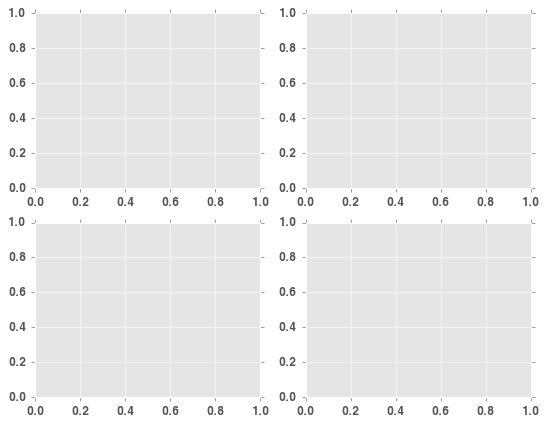

In [81]:
fig, ax = plt.subplots(2,2)

ax[0, 0]
ax[0, 1]
ax[1, 0]
ax[1, 1]




# print(ax)